In [120]:
from sklearn.linear_model import RANSACRegressor
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [121]:
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_train.csv'
x_train = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_train.csv'
y_train = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_test.csv'
x_test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_test.csv'
y_test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/test.csv'
test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/Submission%20Test.csv'
submission_test = pd.read_csv(url)

In [122]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

In [123]:
param_grid = {'min_samples': [20000, 50000, 100000], 'loss': ['squared_error', 'absolute_error']}
grid = GridSearchCV(RANSACRegressor(), param_grid, refit=True, verbose=2)
grid.fit(x_train.to_numpy(), y_train.to_numpy().ravel())
print(grid.best_estimator_)
grid_predictions = grid.predict(x_test.to_numpy())

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............loss=squared_error, min_samples=20000; total time=   8.1s
[CV] END ..............loss=squared_error, min_samples=20000; total time=   8.0s
[CV] END ..............loss=squared_error, min_samples=20000; total time=   7.6s
[CV] END ..............loss=squared_error, min_samples=20000; total time=   8.1s
[CV] END ..............loss=squared_error, min_samples=20000; total time=   8.0s
[CV] END ..............loss=squared_error, min_samples=50000; total time=  11.3s
[CV] END ..............loss=squared_error, min_samples=50000; total time=  11.4s
[CV] END ..............loss=squared_error, min_samples=50000; total time=  11.4s
[CV] END ..............loss=squared_error, min_samples=50000; total time=  11.2s
[CV] END ..............loss=squared_error, min_samples=50000; total time=  11.4s
[CV] END .............loss=squared_error, min_samples=100000; total time=  17.4s
[CV] END .............loss=squared_error, min_sam

In [124]:
Id = test['Store'].astype('string') + '_' + test['Dept'].astype('string') + '_' + test['Date'].astype('string')
y_pred = grid.predict(submission_test)
weekly_sales = np.round(y_pred**3, 2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RANSACRegressor was fitted without feature names
  warnings.warn(


In [125]:
sub = {'Id':Id, 'Weekly_Sales':weekly_sales}
RANSAC_submission = pd.DataFrame(data=sub)
RANSAC_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,8465.88
1,1_1_2012-11-09,8481.89
2,1_1_2012-11-16,8497.91
3,1_1_2012-11-23,8513.96
4,1_1_2012-11-30,8530.03
...,...,...
115059,45_98_2013-06-28,6787.73
115060,45_98_2013-07-05,6801.55
115061,45_98_2013-07-12,6815.38
115062,45_98_2013-07-19,6843.10


In [126]:
RSR = RANSACRegressor(loss='squared_error', min_samples=1000).fit(x_train,y_train)
train_score = RSR.score(x_train, y_train)
test_score = RSR.score(x_test, y_test)
test_score

0.06851920803449574

In [127]:
reg = RANSACRegressor().fit(x_train,y_train)

In [128]:
y_pred = RSR.predict(x_test)

In [129]:
from sklearn.model_selection import learning_curve

train_size = [1, 25, 50, 100, 500, 2500, 7500, 15000]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RSR,
X = x_train,
y = y_train, train_sizes = train_size, cv = 5,
scoring = 'neg_mean_absolute_error')

In [130]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [-7.80933785 -7.81804406 -7.80850743 -7.82809518 -7.80811228]
 [-7.85806469 -7.88904065 -7.85812043 -7.8233461  -7.83246714]
 [-7.7997776  -7.80037109 -7.76710382 -7.77280784 -7.80426695]]

 ----------------------------------------------------------------------

Validation scores:

 [[        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [-7.80373319 -7.80870125 -7.85087837 -7.86197259 -7.85109024]
 [-

In [131]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1             NaN
25            NaN
50            NaN
100           NaN
500           NaN
2500    -7.814419
7500    -7.852208
15000   -7.788865
dtype: float64

 --------------------

Mean validation scores

 1             NaN
25            NaN
50            NaN
100           NaN
500           NaN
2500    -7.835275
7500    -7.842203
15000   -7.817996
dtype: float64


In [132]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


Mean training scores

 1             NaN
25            NaN
50            NaN
100           NaN
500           NaN
2500     7.814419
7500     7.852208
15000    7.788865
dtype: float64

 --------------------

Mean validation scores

 1             NaN
25            NaN
50            NaN
100           NaN
500           NaN
2500     7.835275
7500     7.842203
15000    7.817996
dtype: float64


In [133]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print('Mean Abs Error:', mean_absolute_error(y_test, y_pred))

Mean squared error: 91.95
Coefficient of determination: 0.07
Mean Abs Error: 7.811569124173844


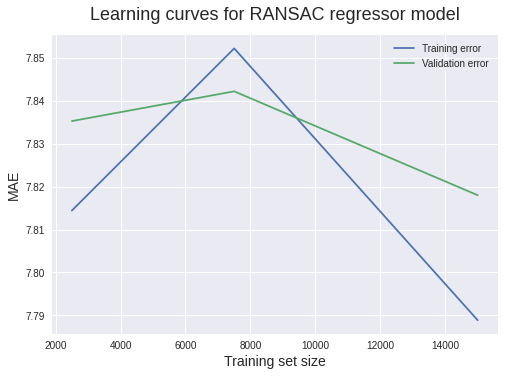

In [134]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for RANSAC regressor model', fontsize = 18, y = 1.03)
plt.legend()

In [136]:
from google.colab import drive
drive.mount('drive')
RANSAC_submission.to_csv('RANSAC_submission.csv')
!cp RANSAC_submission.csv "drive/My Drive/"

Mounted at drive
